In [1]:
import keras
from keras.layers import GRU
import numpy as np

Using TensorFlow backend.


In [2]:
import data_loader as dl

In [3]:
data = dl.DataLoader()

In [4]:
X, Y, m = data.load()

In [5]:
from keras.preprocessing.sequence import pad_sequences

In [6]:
X_pad = pad_sequences(X, maxlen=m, padding='post')
Y_pad = pad_sequences(Y, maxlen=m, padding='post')

In [7]:
sample_weights = np.ones((273, m))
for i in xrange(273):
    for j in xrange(m):
        if (X_pad[i][j] == np.zeros(12)).all():
            sample_weights[i][j] = 0

In [8]:
from keras.models import Sequential

In [9]:
model = Sequential()

In [10]:
from keras.layers import Dense
from keras.layers import Masking
from keras.layers import Dropout
from keras.layers.wrappers import TimeDistributed

In [11]:
from keras.layers import Embedding

In [12]:
mask = np.zeros(12)
model.add(Masking(mask_value=mask, input_shape=(m, 12)))
model.add(GRU(100, return_sequences=True))
model.add(TimeDistributed(Dense(12, activation="softmax")))

In [13]:
from keras.utils.np_utils import to_categorical

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              sample_weight_mode='temporal')

In [15]:
X_train, X_test = X_pad[:136, :], X_pad[136:, :]

In [16]:
Y_train, Y_test = Y_pad[:136, :], Y_pad[136:, :]

In [17]:
sample_weights_train, sample_weights_test = sample_weights[:136, :], sample_weights[136:, :]

In [18]:
# # for custom metrics
import numpy as K

# def weighted_accuracy(y_true, y_pred):
#     score_array *= sample_weights
# score_array /= K.mean(K.cast(K.not_equal(weights, 0), K.floatx()))

def weighted_accuracy(y_true, y_pred):
    # Only for testing
#     score_array = K.equal(K.argmax(y_true, axis=-1),
#                           K.argmax(y_pred, axis=-1))
#     score_array *= weights
#     score_array /= K.mean(K.cast(K.not_equal(weights, 0), K.floatx()))
#     return K.mean(score_array)
    total = 0.0
    count = 0.0
    for i, y_i in enumerate(y_true):
        for j, y_ij in enumerate(y_i):
            if sum(y_ij) > 0:
                total += y_ij[y_pred[i][j]]
                count += 1
    return total / count
    

In [19]:
model.fit(X_train, Y_train, batch_size=136, nb_epoch=100, sample_weight=sample_weights_train)

Epoch 1/100
136/136 [==============================] - 38s - loss: 30.5138
Epoch 2/100
136/136 [==============================] - 27s - loss: 29.8083
Epoch 3/100
136/136 [==============================] - 28s - loss: 29.2396
Epoch 4/100
136/136 [==============================] - 28s - loss: 28.6006
Epoch 5/100
136/136 [==============================] - 28s - loss: 27.7820
Epoch 6/100
136/136 [==============================] - 27s - loss: 26.6862
Epoch 7/100
136/136 [==============================] - 27s - loss: 26.6719
Epoch 8/100
136/136 [==============================] - 34s - loss: 26.7489
Epoch 9/100
136/136 [==============================] - 28s - loss: 26.2132
Epoch 10/100
136/136 [==============================] - 27s - loss: 25.9827
Epoch 11/100
136/136 [==============================] - 27s - loss: 25.9469
Epoch 12/100
136/136 [==============================] - 27s - loss: 25.9142
Epoch 13/100
136/136 [==============================] - 27s - loss: 25.8832
Epoch 14/100
136/136 

In [20]:
Y_prediction = model.predict_classes(X_test, batch_size=5)

137/137 [==============================] - 42s    


In [21]:
# Y_prediction = to_categorical(Y_prediction)
# weighted_accuracy(Y_test, Y_prediction, sample_weights_test)
weighted_accuracy(Y_test, Y_prediction)

0.41814988685872539

In [22]:
model.evaluate(X_test, Y_test, batch_size=137, sample_weight=sample_weights_test)

137/137 [==============================] - 8s


21.10540771484375

In [23]:
Y_prediction[0]

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
Y_prediction.shape

(137, 4954)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
len(model.get_weights())

11

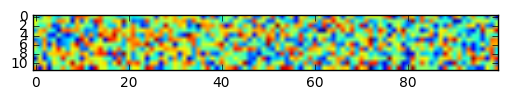

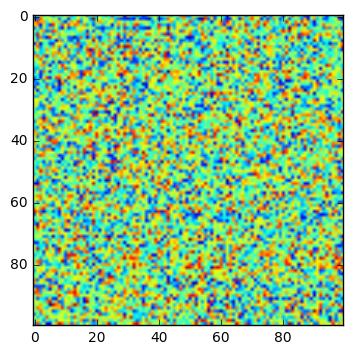

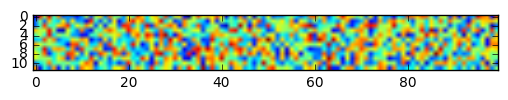

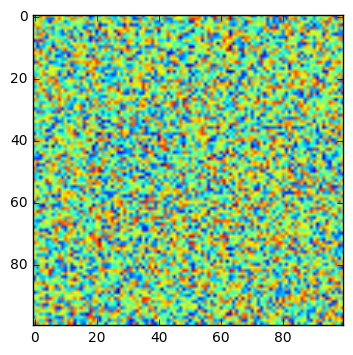

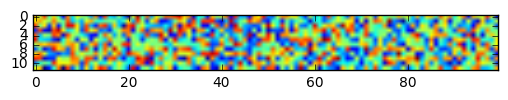

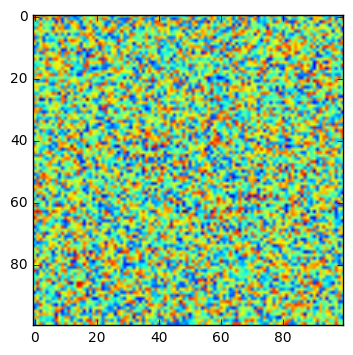

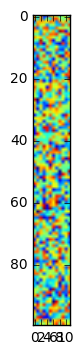

In [27]:
for w in model.get_weights():
    if len(w.shape) > 1:
        plt.figure()
        plt.imshow(w)

In [28]:
count = 0
for y in Y_prediction:
    if sum(y) > 0:
        count += 1
        print sum(y)
print count

188
154
87
8538
300
48
1530
792
75
434
153
78
21
48
82
74
9239
4
17
4
144
76
57
138
160
53
15
305
85
36
96
19
288
39
187
44
26
10
22
30
30
276
78
9779
101
265
163
186
96
231
332
403
2
102
58
128
15
62
69
4
173
86
576
51
266
56
11
26
213
55
15
53
82
4766
5
50
9183
118
68
56
45
9076
101
6
6
10
5
69
19
8930
162
181
22
50
237
114
40
65
173
51
42926
94
192
124
76
211
116
62
160
130
72
89
66
84
18
12
70
444
111
73
24
37971
46
108
83
42
76
3
11
44
46
131
